In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import time
import os
import ldspec
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from statsmodels.stats.multitest import multipletests
from matplotlib import gridspec
import seaborn as sns
import statsmodels.formula.api as smf
from adjustText import adjust_text

# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp'
FIG_PATH = '/n/groups/price/martin/LDSPEC_data/results/fig_res'
TAB_PATH = '/n/groups/price/martin/LDSPEC_data/results/tables'

# DF_TRAIT, DF_ANNOT, DF_PANNOT
DF_TRAIT = pd.read_csv('/n/groups/price/martin/LDSPEC_data/results/tables/trait_info.tsv', sep='\t')
DF_TRAIT.index = DF_TRAIT['Trait_Identifier']
TRAIT_LIST = list(DF_TRAIT.index)
TRAIT_LIST_INDPT = list(DF_TRAIT.index[DF_TRAIT['Indpt']])
print("n_trait=%d" % DF_TRAIT.shape[0])
print("n_trait_indpt=%d" % len(TRAIT_LIST_INDPT))

DF_ANNOT = pd.read_csv('/n/groups/price/martin/LDSPEC_data/results/tables/annot_info.tsv', sep='\t')
DF_ANNOT.index = DF_ANNOT['Identifier']
print("n_annot=%d" % DF_ANNOT.shape[0])

DF_PANNOT = pd.read_csv('/n/groups/price/martin/LDSPEC_data/results/tables/pannot_info.tsv', sep='\t')
DF_PANNOT.index = DF_PANNOT['Identifier']
print("n_pannot=%d" % DF_PANNOT.shape[0])

# Others
temp_df = pd.read_csv('../names.tsv', sep='\t', header=None)
DIC_NAME = {x:y for x,y in zip(temp_df[0], temp_df[1])}
DIC_COLOR = {
    'common' : '#78ADD2', 
    'lf' : '#FFB26E',
    ('p0_p100', 'common') : 'C0',
    ('p0_p100', 'lf') : 'C1',
    ('n100_p0', 'common') : 'C2',
    ('n100_p0', 'lf') : 'C3',
}

MARKER_LIST=['o', 'v', '^', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', '<', '>']

n_trait=70
n_trait_indpt=29
n_annot=45
n_pannot=34


In [3]:
df_data = pd.read_csv(
    '/n/groups/price/martin/LDSPEC_data/results/fig6_simu_colby/fig6_data.csv', sep=',', index_col=0,
)

df_plot = df_data.copy()
df_plot['dist_bin'] = df_plot['bin']
df_plot['maf_bin'] = [x.split('-')[0] for x in df_plot['class']]
df_plot['ld_bin'] = df_plot['corr_class']
df_plot['cor'] = df_plot['mean']
df_plot['cor_se'] = df_plot['stderr']
df_plot[['dist_bin', 'maf_bin', 'ld_bin', 'cor', 'cor_se']].to_csv(TAB_PATH+'/fig6.tsv', sep='\t')


pos lf [-0.07038368 -0.11463675 -0.11864215]
pos common [-0.08195458 -0.07733327 -0.06562275]


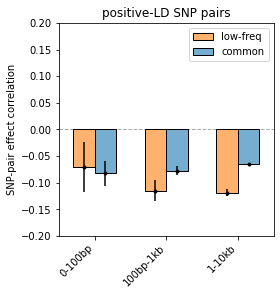

neg lf [ 0.001549    0.00597569 -0.00037784]
neg common [0.0231102  0.02908736 0.02063876]


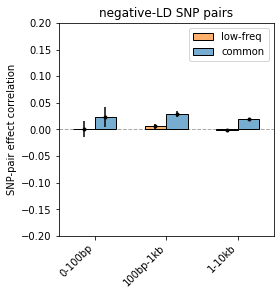

In [9]:
dic_name = {
    'common' : 'common-common',
    'lf' : 'low-low',
    'neg' : 'negative-LD SNP pairs',
    'pos' : 'positive-LD SNP pairs',
}

dbin_list = ['0-100bp', '100bp-1kb', '1-10kb']
for lbin in ['pos', 'neg']:
    plt.figure(figsize=[4, 4.2])
    for i_mbin,mbin in enumerate(['lf', 'common']):
        mbin_colby = dic_name[mbin]
        ind_select = (df_data['corr_class']==lbin) & (df_data['class']==mbin_colby)
        mean_list = [df_data.loc[ind_select & (df_data['bin']==dbin), 'mean'].values[0] for dbin in dbin_list]
        mean_list = np.array(mean_list)
        se_list = [df_data.loc[ind_select & (df_data['bin']==dbin), 'stderr'].values[0] for dbin in dbin_list]
        se_list = np.array(se_list)
        print(lbin, mbin, mean_list)
        
        plt.errorbar(
            np.arange(mean_list.shape[0])-0.15+0.3*i_mbin, mean_list, 
            yerr=se_list*1.96, fmt= '.', color='k',
        )   
        plt.bar(
            np.arange(mean_list.shape[0])-0.15+0.3*i_mbin, mean_list, 
            width=0.3, alpha=1, linewidth=1, edgecolor='k', label=DIC_NAME[mbin], color=DIC_COLOR[mbin]
        )
        
    plt.plot([-0.5, mean_list.shape[0]-0.5], [0, 0], "--", linewidth=1, zorder=0, color="darkgrey")
    plt.xlim([-0.5, mean_list.shape[0]-0.5])
    plt.ylim(-0.2, 0.2)
    plt.legend(loc='upper right')
    plt.ylabel(DIC_NAME['cor'])
        
    plt.xticks(np.arange(mean_list.shape[0]), dbin_list, rotation=45, ha='right')
    plt.title(dic_name[lbin])
    plt.tight_layout()
    plt.savefig(FIG_PATH + '/fig6.%s.pdf'%lbin)
    plt.show()
    
#     break